In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

113


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:652
number of class2:965

 ****** Running generation 0 ****** 

Population's average fitness: 0.51920 stdev: 0.08859
Best fitness: 0.67965 - size: (2, 13) - species 6 - id 64
Average adjusted fitness: 0.169
Mean genetic distance 2.903, standard deviation 0.449
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.725 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55736 stdev: 0.08749
Best fitness: 0.69573 - size: (3, 15) - species 11 - id 273
Average adjusted fitness: 0.198
Mean genetic distance 2.997, standard deviation 0.447
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 8.587 sec (8.656 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56933 stdev: 0.09156
Best fitness: 0.75263 - size: (2, 15) - species 4 - id 502
Average adjusted fitness: 0.323
Mean genetic distance 2.985, standard deviation 0.458
Population of 204 members in 32 species
T

Population's average fitness: 0.50135 stdev: 0.07200
Best fitness: 0.68955 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.269
Mean genetic distance 2.908, standard deviation 0.478
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.941 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53402 stdev: 0.07006
Best fitness: 0.70810 - size: (2, 14) - species 4 - id 315
Average adjusted fitness: 0.249
Mean genetic distance 3.050, standard deviation 0.502
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.521 sec (8.231 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54281 stdev: 0.07769
Best fitness: 0.73469 - size: (4, 16) - species 26 - id 512
Average adjusted fitness: 0.190
Mean genetic distance 3.125, standard deviation 0.507
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 9.039 sec (8.500 average)

 ****** Running generation 3 **

Population's average fitness: 0.49674 stdev: 0.05662
Best fitness: 0.65306 - size: (2, 13) - species 1 - id 26
Average adjusted fitness: 0.180
Mean genetic distance 2.887, standard deviation 0.459
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.675 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51917 stdev: 0.06665
Best fitness: 0.76314 - size: (2, 13) - species 2 - id 266
Average adjusted fitness: 0.185
Mean genetic distance 2.999, standard deviation 0.471
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.983 sec (8.829 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54090 stdev: 0.07394
Best fitness: 0.76314 - size: (2, 13) - species 5 - id 266
Average adjusted fitness: 0.205
Mean genetic distance 3.028, standard deviation 0.471
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.071 sec (8.910 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50140 stdev: 0.05725
Best fitness: 0.67965 - size: (2, 13) - species 4 - id 56
Average adjusted fitness: 0.170
Mean genetic distance 3.006, standard deviation 0.474
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 11.614 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53460 stdev: 0.06151
Best fitness: 0.67965 - size: (2, 13) - species 4 - id 56
Average adjusted fitness: 0.210
Mean genetic distance 3.004, standard deviation 0.474
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 11.542 sec (11.578 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54395 stdev: 0.06901
Best fitness: 0.70563 - size: (4, 17) - species 14 - id 484
Average adjusted fitness: 0.201
Mean genetic distance 3.051, standard deviation 0.481
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 12.575 sec (11.911 average)

 ****** Running generation 

Population's average fitness: 0.49570 stdev: 0.06627
Best fitness: 0.68584 - size: (2, 13) - species 6 - id 178
Average adjusted fitness: 0.192
Mean genetic distance 2.861, standard deviation 0.467
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.720 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53078 stdev: 0.06863
Best fitness: 0.69388 - size: (2, 14) - species 6 - id 380
Average adjusted fitness: 0.217
Mean genetic distance 2.992, standard deviation 0.482
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 9.251 sec (8.986 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54266 stdev: 0.07159
Best fitness: 0.73346 - size: (3, 16) - species 1 - id 517
Average adjusted fitness: 0.211
Mean genetic distance 3.032, standard deviation 0.485
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 12.773 sec (10.248 average)

 ****** Running generation 3 

Population's average fitness: 0.45147 stdev: 0.14069
Best fitness: 0.73964 - size: (2, 13) - species 2 - id 11
Average adjusted fitness: 0.198
Mean genetic distance 2.972, standard deviation 0.479
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 14.988 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59348 stdev: 0.13161
Best fitness: 0.75201 - size: (2, 14) - species 29 - id 366
Average adjusted fitness: 0.305
Mean genetic distance 3.122, standard deviation 0.499
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 13.491 sec (14.239 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61115 stdev: 0.13348
Best fitness: 0.75201 - size: (2, 14) - species 29 - id 366
Average adjusted fitness: 0.345
Mean genetic distance 3.102, standard deviation 0.488
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 12.157 sec (13.545 average)

 ****** Running generatio

Population's average fitness: 0.47582 stdev: 0.08588
Best fitness: 0.68522 - size: (2, 13) - species 3 - id 27
Average adjusted fitness: 0.187
Mean genetic distance 2.916, standard deviation 0.445
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 10.223 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53840 stdev: 0.09485
Best fitness: 0.74768 - size: (3, 15) - species 6 - id 348
Average adjusted fitness: 0.205
Mean genetic distance 3.018, standard deviation 0.436
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 13.398 sec (11.811 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55953 stdev: 0.09331
Best fitness: 0.75015 - size: (3, 15) - species 3 - id 525
Average adjusted fitness: 0.281
Mean genetic distance 3.124, standard deviation 0.445
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 12.165 sec (11.929 average)

 ****** Running generation 

Population's average fitness: 0.49663 stdev: 0.05641
Best fitness: 0.65430 - size: (2, 13) - species 4 - id 179
Average adjusted fitness: 0.180
Mean genetic distance 2.948, standard deviation 0.482
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.710 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52031 stdev: 0.05979
Best fitness: 0.69759 - size: (2, 13) - species 3 - id 319
Average adjusted fitness: 0.174
Mean genetic distance 3.003, standard deviation 0.453
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 10.889 sec (10.300 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53674 stdev: 0.06318
Best fitness: 0.70872 - size: (4, 15) - species 4 - id 473
Average adjusted fitness: 0.180
Mean genetic distance 3.010, standard deviation 0.468
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 11.662 sec (10.754 average)

 ****** Running generation 

Population's average fitness: 0.49068 stdev: 0.09899
Best fitness: 0.75139 - size: (2, 13) - species 3 - id 144
Average adjusted fitness: 0.233
Mean genetic distance 2.843, standard deviation 0.432
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 11.271 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54807 stdev: 0.09419
Best fitness: 0.75139 - size: (2, 13) - species 3 - id 144
Average adjusted fitness: 0.215
Mean genetic distance 2.968, standard deviation 0.471
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 11.762 sec (11.516 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56476 stdev: 0.09741
Best fitness: 0.76438 - size: (3, 14) - species 3 - id 543
Average adjusted fitness: 0.313
Mean genetic distance 2.963, standard deviation 0.469
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 11.371 sec (11.468 average)

 ****** Running generation

Population's average fitness: 0.48678 stdev: 0.09413
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.181
Mean genetic distance 2.914, standard deviation 0.483
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 8.391 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53737 stdev: 0.09617
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.186
Mean genetic distance 2.992, standard deviation 0.495
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 9.611 sec (9.001 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56261 stdev: 0.09037
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.209
Mean genetic distance 3.009, standard deviation 0.499
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 13.296 sec (10.433 average)

 ****** Running generation 3 

Population's average fitness: 0.55665 stdev: 0.14022
Best fitness: 0.75201 - size: (2, 13) - species 2 - id 198
Average adjusted fitness: 0.312
Mean genetic distance 2.985, standard deviation 0.516
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.790 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59120 stdev: 0.14874
Best fitness: 0.76685 - size: (3, 14) - species 17 - id 297
Average adjusted fitness: 0.304
Mean genetic distance 3.098, standard deviation 0.521
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 13.858 sec (11.824 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62542 stdev: 0.12962
Best fitness: 0.78726 - size: (3, 15) - species 24 - id 410
Average adjusted fitness: 0.309
Mean genetic distance 3.140, standard deviation 0.528
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 12.855 sec (12.168 average)

 ****** Running generatio


Population's average fitness: 0.52510 stdev: 0.09485
Best fitness: 0.70315 - size: (2, 13) - species 1 - id 89
Average adjusted fitness: 0.259
Mean genetic distance 2.910, standard deviation 0.483
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 9.491 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55267 stdev: 0.09493
Best fitness: 0.72171 - size: (3, 15) - species 20 - id 352
Average adjusted fitness: 0.284
Mean genetic distance 3.061, standard deviation 0.488
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 10.602 sec (10.046 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56858 stdev: 0.09060
Best fitness: 0.72171 - size: (3, 15) - species 20 - id 352
Average adjusted fitness: 0.260
Mean genetic distance 3.136, standard deviation 0.494
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 11.065 sec (10.386 average)

 ****** Running generatio

Population's average fitness: 0.50116 stdev: 0.04806
Best fitness: 0.67656 - size: (2, 13) - species 7 - id 116
Average adjusted fitness: 0.124
Mean genetic distance 2.858, standard deviation 0.474
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 9.313 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51903 stdev: 0.04787
Best fitness: 0.67656 - size: (2, 13) - species 7 - id 116
Average adjusted fitness: 0.139
Mean genetic distance 2.991, standard deviation 0.496
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 9.994 sec (9.654 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52329 stdev: 0.04770
Best fitness: 0.67656 - size: (2, 13) - species 7 - id 116
Average adjusted fitness: 0.116
Mean genetic distance 3.074, standard deviation 0.500
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 10.126 sec (9.811 average)

 ****** Running generation 3 *

Population's average fitness: 0.53709 stdev: 0.10823
Best fitness: 0.81818 - size: (2, 13) - species 5 - id 34
Average adjusted fitness: 0.298
Mean genetic distance 2.998, standard deviation 0.514
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 9.345 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57356 stdev: 0.10540
Best fitness: 0.84168 - size: (2, 13) - species 8 - id 357
Average adjusted fitness: 0.264
Mean genetic distance 3.086, standard deviation 0.507
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 10.418 sec (9.881 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57774 stdev: 0.11028
Best fitness: 0.84168 - size: (2, 13) - species 8 - id 357
Average adjusted fitness: 0.261
Mean genetic distance 3.107, standard deviation 0.512
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 9.746 sec (9.836 average)

 ****** Running generation 3 **

Population's average fitness: 0.53160 stdev: 0.15039
Best fitness: 0.79468 - size: (2, 13) - species 1 - id 17
Average adjusted fitness: 0.251
Mean genetic distance 2.873, standard deviation 0.464
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.379 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62531 stdev: 0.12977
Best fitness: 0.80767 - size: (3, 15) - species 17 - id 341
Average adjusted fitness: 0.322
Mean genetic distance 2.974, standard deviation 0.466
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.732 sec (6.556 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63602 stdev: 0.13241
Best fitness: 0.82993 - size: (2, 13) - species 17 - id 525
Average adjusted fitness: 0.334
Mean genetic distance 2.957, standard deviation 0.466
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.870 sec (6.661 average)

 ****** Running generation 3 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.50374 stdev: 0.08791
Best fitness: 0.73222 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.279
Mean genetic distance 3.005, standard deviation 0.487
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 14.897 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52758 stdev: 0.08458
Best fitness: 0.76933 - size: (3, 15) - species 2 - id 356
Average adjusted fitness: 0.277
Mean genetic distance 3.073, standard deviation 0.492
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.314 sec (11.105 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53347 stdev: 0.08633
Best fitness: 0.76933 - size: (3, 15) - species 2 - id 356
Average adjusted fitness: 0.325
Mean genetic distance 3.095, standard deviation 0.501
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.183 sec (9.798 a

Population's average fitness: 0.48376 stdev: 0.09002
Best fitness: 0.68646 - size: (2, 13) - species 2 - id 39
Average adjusted fitness: 0.183
Mean genetic distance 2.924, standard deviation 0.446
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.575 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53999 stdev: 0.08598
Best fitness: 0.70068 - size: (2, 14) - species 10 - id 239
Average adjusted fitness: 0.216
Mean genetic distance 2.974, standard deviation 0.482
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 9.373 sec (8.974 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55686 stdev: 0.08818
Best fitness: 0.70068 - size: (2, 14) - species 10 - id 239
Average adjusted fitness: 0.258
Mean genetic distance 2.967, standard deviation 0.494
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 9.611 sec (9.186 average)

 ****** Running generation 3 *

Population's average fitness: 0.47323 stdev: 0.15987
Best fitness: 0.80643 - size: (2, 13) - species 5 - id 117
Average adjusted fitness: 0.258
Mean genetic distance 2.945, standard deviation 0.464
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.483 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57825 stdev: 0.14644
Best fitness: 0.80643 - size: (2, 13) - species 5 - id 117
Average adjusted fitness: 0.344
Mean genetic distance 3.020, standard deviation 0.479
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 7.115 sec (6.799 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59738 stdev: 0.14389
Best fitness: 0.80643 - size: (2, 13) - species 1 - id 117
Average adjusted fitness: 0.313
Mean genetic distance 3.000, standard deviation 0.505
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 9.068 sec (7.556 average)

 ****** Running generation 3 **

Population's average fitness: 0.44999 stdev: 0.14744
Best fitness: 0.74459 - size: (2, 13) - species 1 - id 51
Average adjusted fitness: 0.188
Mean genetic distance 2.911, standard deviation 0.484
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.460 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56327 stdev: 0.14663
Best fitness: 0.77798 - size: (3, 15) - species 3 - id 232
Average adjusted fitness: 0.257
Mean genetic distance 3.020, standard deviation 0.483
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.412 sec (7.436 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58076 stdev: 0.14988
Best fitness: 0.77798 - size: (3, 15) - species 28 - id 232
Average adjusted fitness: 0.270
Mean genetic distance 3.056, standard deviation 0.488
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 7.539 sec (7.470 average)

 ****** Running generation 3 **

Population's average fitness: 0.51955 stdev: 0.08152
Best fitness: 0.70748 - size: (2, 13) - species 3 - id 102
Average adjusted fitness: 0.187
Mean genetic distance 2.921, standard deviation 0.466
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.358 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55441 stdev: 0.08511
Best fitness: 0.78479 - size: (3, 15) - species 1 - id 315
Average adjusted fitness: 0.204
Mean genetic distance 3.052, standard deviation 0.454
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.900 sec (7.129 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56162 stdev: 0.08879
Best fitness: 0.78479 - size: (3, 15) - species 1 - id 315
Average adjusted fitness: 0.227
Mean genetic distance 3.122, standard deviation 0.458
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.788 sec (7.682 average)

 ****** Running generation 3 **

Population's average fitness: 0.47840 stdev: 0.09126
Best fitness: 0.69388 - size: (2, 13) - species 2 - id 187
Average adjusted fitness: 0.167
Mean genetic distance 2.908, standard deviation 0.452
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 7.712 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54074 stdev: 0.09691
Best fitness: 0.70006 - size: (3, 14) - species 11 - id 276
Average adjusted fitness: 0.255
Mean genetic distance 3.047, standard deviation 0.456
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.086 sec (7.399 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56096 stdev: 0.09451
Best fitness: 0.78417 - size: (2, 13) - species 16 - id 516
Average adjusted fitness: 0.209
Mean genetic distance 3.008, standard deviation 0.481
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 7.548 sec (7.449 average)

 ****** Running generation 3 

Population's average fitness: 0.44794 stdev: 0.14587
Best fitness: 0.72356 - size: (2, 13) - species 3 - id 197
Average adjusted fitness: 0.224
Mean genetic distance 2.950, standard deviation 0.514
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56747 stdev: 0.14136
Best fitness: 0.73655 - size: (3, 15) - species 4 - id 285
Average adjusted fitness: 0.302
Mean genetic distance 3.098, standard deviation 0.513
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.261 sec (6.641 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59731 stdev: 0.14328
Best fitness: 0.74335 - size: (2, 14) - species 2 - id 526
Average adjusted fitness: 0.341
Mean genetic distance 3.158, standard deviation 0.497
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 8.926 sec (7.403 average)

 ****** Running generation 3 **

Population's average fitness: 0.45206 stdev: 0.15476
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 10
Average adjusted fitness: 0.230
Mean genetic distance 2.981, standard deviation 0.478
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.175 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56312 stdev: 0.15011
Best fitness: 0.78108 - size: (2, 13) - species 21 - id 334
Average adjusted fitness: 0.342
Mean genetic distance 3.063, standard deviation 0.483
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 10.037 sec (8.606 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59506 stdev: 0.15000
Best fitness: 0.78108 - size: (2, 13) - species 2 - id 334
Average adjusted fitness: 0.360
Mean genetic distance 3.101, standard deviation 0.493
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.955 sec (8.722 average)

 ****** Running generation 3 *

Population's average fitness: 0.51799 stdev: 0.08903
Best fitness: 0.71367 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.216
Mean genetic distance 2.804, standard deviation 0.443
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 10.370 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55563 stdev: 0.08662
Best fitness: 0.72480 - size: (2, 14) - species 5 - id 292
Average adjusted fitness: 0.212
Mean genetic distance 2.934, standard deviation 0.494
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.697 sec (9.034 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56386 stdev: 0.09474
Best fitness: 0.72913 - size: (3, 15) - species 13 - id 489
Average adjusted fitness: 0.230
Mean genetic distance 3.002, standard deviation 0.488
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.060 sec (8.709 average)

 ****** Running generation 3 **

Population's average fitness: 0.47547 stdev: 0.10081
Best fitness: 0.79716 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.265
Mean genetic distance 2.839, standard deviation 0.409
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.708 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53673 stdev: 0.10740
Best fitness: 0.79716 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.268
Mean genetic distance 2.981, standard deviation 0.452
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.304 sec (6.506 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55990 stdev: 0.10941
Best fitness: 0.79716 - size: (2, 13) - species 1 - id 93
Average adjusted fitness: 0.219
Mean genetic distance 3.035, standard deviation 0.457
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 11.716 sec (8.243 average)

 ****** Running generation 3 ****

Population's average fitness: 0.47354 stdev: 0.07824
Best fitness: 0.66667 - size: (2, 13) - species 2 - id 145
Average adjusted fitness: 0.144
Mean genetic distance 2.859, standard deviation 0.466
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 7.767 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54520 stdev: 0.08372
Best fitness: 0.69079 - size: (2, 14) - species 1 - id 328
Average adjusted fitness: 0.226
Mean genetic distance 2.994, standard deviation 0.478
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.224 sec (7.496 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54953 stdev: 0.08947
Best fitness: 0.69079 - size: (2, 14) - species 1 - id 328
Average adjusted fitness: 0.240
Mean genetic distance 3.092, standard deviation 0.488
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 6.880 sec (7.291 average)

 ****** Running generation 3 **

Population's average fitness: 0.49893 stdev: 0.04485
Best fitness: 0.61781 - size: (2, 13) - species 3 - id 132
Average adjusted fitness: 0.126
Mean genetic distance 3.020, standard deviation 0.512
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.764 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52253 stdev: 0.05078
Best fitness: 0.65492 - size: (2, 12) - species 2 - id 307
Average adjusted fitness: 0.143
Mean genetic distance 3.123, standard deviation 0.527
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.662 sec (5.713 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53294 stdev: 0.05264
Best fitness: 0.71676 - size: (3, 16) - species 8 - id 523
Average adjusted fitness: 0.117
Mean genetic distance 3.186, standard deviation 0.522
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 5.693 sec (5.707 average)

 ****** Running generation 3 **

Population's average fitness: 0.49756 stdev: 0.05315
Best fitness: 0.65986 - size: (2, 13) - species 2 - id 181
Average adjusted fitness: 0.148
Mean genetic distance 2.965, standard deviation 0.504
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.492 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52320 stdev: 0.05642
Best fitness: 0.66419 - size: (2, 14) - species 2 - id 331
Average adjusted fitness: 0.213
Mean genetic distance 3.024, standard deviation 0.507
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 5.463 sec (5.478 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53762 stdev: 0.06187
Best fitness: 0.68646 - size: (3, 15) - species 2 - id 530
Average adjusted fitness: 0.247
Mean genetic distance 3.086, standard deviation 0.522
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.844 sec (6.267 average)

 ****** Running generation 3 **

Population's average fitness: 0.44977 stdev: 0.22254
Best fitness: 0.83673 - size: (2, 13) - species 2 - id 112
Average adjusted fitness: 0.271
Mean genetic distance 2.881, standard deviation 0.410
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.182 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57780 stdev: 0.21358
Best fitness: 0.84230 - size: (3, 15) - species 25 - id 377
Average adjusted fitness: 0.430
Mean genetic distance 2.968, standard deviation 0.428
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.861 sec (6.522 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66541 stdev: 0.17724
Best fitness: 0.84230 - size: (3, 15) - species 25 - id 377
Average adjusted fitness: 0.446
Mean genetic distance 2.915, standard deviation 0.457
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 5.846 sec (6.296 average)

 ****** Running generation 3 

number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49429 stdev: 0.06440
Best fitness: 0.69140 - size: (2, 13) - species 5 - id 133
Average adjusted fitness: 0.191
Mean genetic distance 2.923, standard deviation 0.494
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.903 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52849 stdev: 0.07940
Best fitness: 0.78541 - size: (3, 14) - species 22 - id 354
Average adjusted fitness: 0.242
Mean genetic distance 3.017, standard deviation 0.507
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.218 sec (5.061 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55283 stdev: 0.08055
Best fitness: 0.78541 - size: (3, 14) - species 22 - id 354
Average adjusted fitness: 0.192
Mean genetic distance 3.002, standard deviation 0.482
Population of 200 members in 28 species
Total extinct


Population's average fitness: 0.49771 stdev: 0.06421
Best fitness: 0.75634 - size: (2, 13) - species 4 - id 19
Average adjusted fitness: 0.194
Mean genetic distance 2.884, standard deviation 0.414
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.154 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53356 stdev: 0.06576
Best fitness: 0.76562 - size: (3, 15) - species 4 - id 352
Average adjusted fitness: 0.185
Mean genetic distance 2.967, standard deviation 0.443
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.567 sec (8.860 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53692 stdev: 0.07039
Best fitness: 0.76562 - size: (3, 15) - species 4 - id 352
Average adjusted fitness: 0.194
Mean genetic distance 2.997, standard deviation 0.457
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 5.932 sec (7.884 average)

 ****** Running generation 3 **

Population's average fitness: 0.49614 stdev: 0.04863
Best fitness: 0.63760 - size: (2, 13) - species 1 - id 60
Average adjusted fitness: 0.154
Mean genetic distance 2.904, standard deviation 0.461
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.689 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51630 stdev: 0.04621
Best fitness: 0.63760 - size: (2, 13) - species 6 - id 60
Average adjusted fitness: 0.161
Mean genetic distance 2.963, standard deviation 0.436
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.591 sec (6.140 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52635 stdev: 0.05364
Best fitness: 0.68336 - size: (4, 16) - species 9 - id 483
Average adjusted fitness: 0.141
Mean genetic distance 2.985, standard deviation 0.456
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.288 sec (6.189 average)

 ****** Running generation 3 ****

number of class1:967
number of class2:650

 ****** Running generation 0 ****** 

Population's average fitness: 0.47676 stdev: 0.09280
Best fitness: 0.70934 - size: (2, 13) - species 2 - id 189
Average adjusted fitness: 0.221
Mean genetic distance 2.908, standard deviation 0.471
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.390 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54391 stdev: 0.09810
Best fitness: 0.77798 - size: (2, 13) - species 8 - id 210
Average adjusted fitness: 0.214
Mean genetic distance 2.991, standard deviation 0.467
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.715 sec (6.053 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56457 stdev: 0.09632
Best fitness: 0.78973 - size: (4, 18) - species 4 - id 533
Average adjusted fitness: 0.224
Mean genetic distance 3.035, standard deviation 0.494
Population of 202 members in 30 species
Total extinctio

Population's average fitness: 0.48767 stdev: 0.07793
Best fitness: 0.67223 - size: (2, 13) - species 4 - id 60
Average adjusted fitness: 0.189
Mean genetic distance 2.965, standard deviation 0.499
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 14.184 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53775 stdev: 0.08400
Best fitness: 0.70192 - size: (3, 15) - species 1 - id 344
Average adjusted fitness: 0.191
Mean genetic distance 3.019, standard deviation 0.501
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 11.484 sec (12.834 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55678 stdev: 0.08588
Best fitness: 0.71243 - size: (4, 16) - species 29 - id 525
Average adjusted fitness: 0.181
Mean genetic distance 3.032, standard deviation 0.518
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 11.207 sec (12.292 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.50646 stdev: 0.07666
Best fitness: 0.70377 - size: (2, 13) - species 3 - id 134
Average adjusted fitness: 0.284
Mean genetic distance 2.858, standard deviation 0.484
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 39.863 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55059 stdev: 0.07994
Best fitness: 0.76252 - size: (3, 15) - species 2 - id 338
Average adjusted fitness: 0.253
Mean genetic distance 3.033, standard deviation 0.494
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 30.953 sec (35.408 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56079 stdev: 0.09130
Best fitness: 0.80087 - size: (2, 13) - species 14 - id 521
Average adjusted fitness: 0.220
Mean genetic distance 3.111, standard deviation 0.495
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 29.315 sec (33.


 ****** Running generation 0 ****** 

Population's average fitness: 0.46010 stdev: 0.14358
Best fitness: 0.75510 - size: (2, 13) - species 3 - id 179
Average adjusted fitness: 0.250
Mean genetic distance 3.004, standard deviation 0.525
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 15.088 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56547 stdev: 0.13957
Best fitness: 0.78788 - size: (2, 13) - species 2 - id 335
Average adjusted fitness: 0.287
Mean genetic distance 3.121, standard deviation 0.563
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.560 sec (16.824 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58653 stdev: 0.15434
Best fitness: 0.79468 - size: (4, 15) - species 16 - id 402
Average adjusted fitness: 0.330
Mean genetic distance 3.134, standard deviation 0.546
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 12.698 sec (15.


 ****** Running generation 0 ****** 

Population's average fitness: 0.45338 stdev: 0.14000
Best fitness: 0.70254 - size: (2, 13) - species 5 - id 126
Average adjusted fitness: 0.199
Mean genetic distance 2.952, standard deviation 0.494
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 26.771 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56632 stdev: 0.14444
Best fitness: 0.74212 - size: (2, 13) - species 18 - id 307
Average adjusted fitness: 0.301
Mean genetic distance 3.085, standard deviation 0.467
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 17.601 sec (22.186 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60014 stdev: 0.14345
Best fitness: 0.74212 - size: (2, 13) - species 18 - id 307
Average adjusted fitness: 0.313
Mean genetic distance 3.121, standard deviation 0.459
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 15.055 sec (19

Population's average fitness: 0.53779 stdev: 0.15109
Best fitness: 0.78664 - size: (2, 13) - species 1 - id 19
Average adjusted fitness: 0.317
Mean genetic distance 2.960, standard deviation 0.482
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.442 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61675 stdev: 0.13684
Best fitness: 0.81076 - size: (3, 15) - species 2 - id 371
Average adjusted fitness: 0.363
Mean genetic distance 3.025, standard deviation 0.474
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.637 sec (6.539 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62054 stdev: 0.14027
Best fitness: 0.83550 - size: (3, 14) - species 15 - id 508
Average adjusted fitness: 0.412
Mean genetic distance 3.039, standard deviation 0.471
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.610 sec (6.896 average)

 ****** Running generation 3 **

Population's average fitness: 0.42415 stdev: 0.27571
Best fitness: 0.90662 - size: (2, 13) - species 2 - id 180
Average adjusted fitness: 0.328
Mean genetic distance 2.952, standard deviation 0.461
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 9.639 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63965 stdev: 0.28243
Best fitness: 0.93321 - size: (2, 14) - species 3 - id 265
Average adjusted fitness: 0.542
Mean genetic distance 3.059, standard deviation 0.466
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.778 sec (9.209 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68863 stdev: 0.27980
Best fitness: 0.93321 - size: (2, 14) - species 3 - id 265
Average adjusted fitness: 0.541
Mean genetic distance 3.128, standard deviation 0.445
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.977 sec (8.798 average)

 ****** Running generation 3 **

Population's average fitness: 0.49268 stdev: 0.08432
Best fitness: 0.67161 - size: (2, 13) - species 5 - id 51
Average adjusted fitness: 0.187
Mean genetic distance 2.950, standard deviation 0.467
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.328 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54048 stdev: 0.08029
Best fitness: 0.68336 - size: (3, 15) - species 5 - id 287
Average adjusted fitness: 0.171
Mean genetic distance 3.090, standard deviation 0.475
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 5.684 sec (6.006 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55912 stdev: 0.07717
Best fitness: 0.70625 - size: (2, 12) - species 15 - id 471
Average adjusted fitness: 0.194
Mean genetic distance 3.122, standard deviation 0.478
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 5.985 sec (5.999 average)

 ****** Running generation 3 **

Population's average fitness: 0.49783 stdev: 0.06323
Best fitness: 0.73284 - size: (2, 13) - species 6 - id 141
Average adjusted fitness: 0.206
Mean genetic distance 2.921, standard deviation 0.476
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.963 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53046 stdev: 0.05729
Best fitness: 0.73284 - size: (2, 13) - species 6 - id 141
Average adjusted fitness: 0.186
Mean genetic distance 2.997, standard deviation 0.500
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.498 sec (6.230 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53909 stdev: 0.06854
Best fitness: 0.73284 - size: (2, 13) - species 6 - id 141
Average adjusted fitness: 0.185
Mean genetic distance 3.026, standard deviation 0.484
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.717 sec (6.393 average)

 ****** Running generation 3 **

Population's average fitness: 0.45632 stdev: 0.14705
Best fitness: 0.75325 - size: (2, 13) - species 3 - id 177
Average adjusted fitness: 0.217
Mean genetic distance 2.889, standard deviation 0.418
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.554 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57064 stdev: 0.15394
Best fitness: 0.78664 - size: (2, 13) - species 21 - id 330
Average adjusted fitness: 0.338
Mean genetic distance 2.953, standard deviation 0.435
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.345 sec (7.450 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62242 stdev: 0.13795
Best fitness: 0.78664 - size: (2, 13) - species 3 - id 330
Average adjusted fitness: 0.389
Mean genetic distance 2.978, standard deviation 0.450
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.328 sec (7.409 average)

 ****** Running generation 3 *

Population's average fitness: 0.50669 stdev: 0.08059
Best fitness: 0.75263 - size: (2, 13) - species 1 - id 83
Average adjusted fitness: 0.255
Mean genetic distance 3.044, standard deviation 0.493
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.906 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54429 stdev: 0.08015
Best fitness: 0.75696 - size: (2, 14) - species 1 - id 339
Average adjusted fitness: 0.241
Mean genetic distance 3.162, standard deviation 0.508
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.408 sec (5.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56760 stdev: 0.08256
Best fitness: 0.77304 - size: (2, 14) - species 1 - id 522
Average adjusted fitness: 0.297
Mean genetic distance 3.122, standard deviation 0.505
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 5.587 sec (5.300 average)

 ****** Running generation 3 ***

running:86/250
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.51792 stdev: 0.09039
Best fitness: 0.70872 - size: (2, 13) - species 5 - id 72
Average adjusted fitness: 0.194
Mean genetic distance 2.938, standard deviation 0.525
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.108 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56409 stdev: 0.08235
Best fitness: 0.72109 - size: (3, 15) - species 1 - id 244
Average adjusted fitness: 0.185
Mean genetic distance 3.021, standard deviation 0.498
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.483 sec (5.296 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56986 stdev: 0.09018
Best fitness: 0.72109 - size: (3, 15) - species 21 - id 244
Average adjusted fitness: 0.271
Mean genetic distance 3.071, standard deviation 0.501
Population of 198 members in 32 species


Population's average fitness: 0.48699 stdev: 0.09317
Best fitness: 0.67594 - size: (2, 13) - species 3 - id 85
Average adjusted fitness: 0.178
Mean genetic distance 2.856, standard deviation 0.437
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.026 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53613 stdev: 0.09743
Best fitness: 0.69635 - size: (3, 14) - species 1 - id 313
Average adjusted fitness: 0.192
Mean genetic distance 2.961, standard deviation 0.449
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.376 sec (5.201 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56326 stdev: 0.08876
Best fitness: 0.70563 - size: (4, 17) - species 15 - id 479
Average adjusted fitness: 0.174
Mean genetic distance 3.003, standard deviation 0.472
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.652 sec (5.351 average)

 ****** Running generation 3 **

Population's average fitness: 0.52237 stdev: 0.08541
Best fitness: 0.71181 - size: (2, 13) - species 3 - id 90
Average adjusted fitness: 0.261
Mean genetic distance 2.893, standard deviation 0.439
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.938 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55861 stdev: 0.08311
Best fitness: 0.73531 - size: (2, 13) - species 8 - id 230
Average adjusted fitness: 0.189
Mean genetic distance 2.965, standard deviation 0.448
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.261 sec (5.099 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56085 stdev: 0.08658
Best fitness: 0.73531 - size: (2, 13) - species 8 - id 230
Average adjusted fitness: 0.220
Mean genetic distance 2.967, standard deviation 0.457
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 5.526 sec (5.242 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51994 stdev: 0.08710
Best fitness: 0.68769 - size: (2, 13) - species 5 - id 87
Average adjusted fitness: 0.216
Mean genetic distance 2.903, standard deviation 0.471
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.974 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55609 stdev: 0.08532
Best fitness: 0.68769 - size: (2, 13) - species 5 - id 87
Average adjusted fitness: 0.173
Mean genetic distance 3.028, standard deviation 0.509
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.247 sec (5.111 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55097 stdev: 0.09225
Best fitness: 0.71058 - size: (2, 15) - species 5 - id 546
Average adjusted fitness: 0.223
Mean genetic distance 3.125, standard deviation 0.510
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.489 sec (5.237 average)

 ****** Running generation 3 ****

Population's average fitness: 0.49067 stdev: 0.05840
Best fitness: 0.67223 - size: (2, 13) - species 6 - id 77
Average adjusted fitness: 0.181
Mean genetic distance 2.893, standard deviation 0.450
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 4.926 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51872 stdev: 0.05564
Best fitness: 0.72418 - size: (3, 14) - species 4 - id 304
Average adjusted fitness: 0.165
Mean genetic distance 2.957, standard deviation 0.494
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.241 sec (5.083 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52450 stdev: 0.06525
Best fitness: 0.76129 - size: (4, 16) - species 2 - id 534
Average adjusted fitness: 0.162
Mean genetic distance 3.001, standard deviation 0.489
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.391 sec (5.186 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49849 stdev: 0.05794
Best fitness: 0.68831 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.176
Mean genetic distance 2.926, standard deviation 0.500
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.928 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52435 stdev: 0.06465
Best fitness: 0.73160 - size: (2, 13) - species 5 - id 342
Average adjusted fitness: 0.200
Mean genetic distance 3.040, standard deviation 0.516
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.317 sec (5.123 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53419 stdev: 0.06850
Best fitness: 0.73160 - size: (2, 13) - species 5 - id 342
Average adjusted fitness: 0.202
Mean genetic distance 3.079, standard deviation 0.531
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 5.448 sec (5.231 average)

 ****** Running generation 3 **

Population's average fitness: 0.50581 stdev: 0.05733
Best fitness: 0.70006 - size: (2, 13) - species 5 - id 59
Average adjusted fitness: 0.167
Mean genetic distance 3.002, standard deviation 0.485
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 4.968 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52347 stdev: 0.06282
Best fitness: 0.70006 - size: (2, 13) - species 5 - id 59
Average adjusted fitness: 0.172
Mean genetic distance 3.048, standard deviation 0.448
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 5.335 sec (5.152 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53382 stdev: 0.05629
Best fitness: 0.70006 - size: (2, 13) - species 5 - id 59
Average adjusted fitness: 0.102
Mean genetic distance 3.036, standard deviation 0.460
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 5.507 sec (5.270 average)

 ****** Running generation 3 *****

Population's average fitness: 0.50346 stdev: 0.06191
Best fitness: 0.66852 - size: (2, 13) - species 3 - id 172
Average adjusted fitness: 0.156
Mean genetic distance 2.939, standard deviation 0.481
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 5.006 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52879 stdev: 0.06464
Best fitness: 0.72418 - size: (2, 14) - species 18 - id 338
Average adjusted fitness: 0.196
Mean genetic distance 2.993, standard deviation 0.502
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 5.249 sec (5.127 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53948 stdev: 0.06372
Best fitness: 0.72418 - size: (2, 14) - species 18 - id 338
Average adjusted fitness: 0.232
Mean genetic distance 3.034, standard deviation 0.506
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 5.451 sec (5.235 average)

 ****** Running generation 3 

Population's average fitness: 0.52083 stdev: 0.09284
Best fitness: 0.73036 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.211
Mean genetic distance 2.906, standard deviation 0.451
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.893 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56069 stdev: 0.09309
Best fitness: 0.73036 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.268
Mean genetic distance 2.961, standard deviation 0.446
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.282 sec (5.088 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58397 stdev: 0.08236
Best fitness: 0.77489 - size: (3, 14) - species 5 - id 466
Average adjusted fitness: 0.215
Mean genetic distance 2.974, standard deviation 0.435
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.459 sec (5.211 average)

 ****** Running generation 3 ****

Population's average fitness: 0.50266 stdev: 0.05620
Best fitness: 0.71676 - size: (2, 13) - species 5 - id 179
Average adjusted fitness: 0.239
Mean genetic distance 2.932, standard deviation 0.485
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 4.930 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52107 stdev: 0.05525
Best fitness: 0.71676 - size: (2, 13) - species 2 - id 179
Average adjusted fitness: 0.226
Mean genetic distance 3.046, standard deviation 0.512
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.323 sec (5.126 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53158 stdev: 0.06057
Best fitness: 0.73346 - size: (3, 14) - species 2 - id 544
Average adjusted fitness: 0.241
Mean genetic distance 3.067, standard deviation 0.516
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 5.647 sec (5.300 average)

 ****** Running generation 3 **

number of class1:815
number of class2:802

 ****** Running generation 0 ****** 

Population's average fitness: 0.50016 stdev: 0.05170
Best fitness: 0.65182 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.183
Mean genetic distance 2.955, standard deviation 0.498
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 4.921 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52012 stdev: 0.05624
Best fitness: 0.66914 - size: (2, 14) - species 5 - id 313
Average adjusted fitness: 0.164
Mean genetic distance 3.065, standard deviation 0.491
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.326 sec (5.123 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53296 stdev: 0.05321
Best fitness: 0.66914 - size: (2, 14) - species 3 - id 313
Average adjusted fitness: 0.128
Mean genetic distance 3.137, standard deviation 0.490
Population of 200 members in 34 species
Total extinctio

running:108/250
number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51683 stdev: 0.09299
Best fitness: 0.70748 - size: (2, 13) - species 1 - id 44
Average adjusted fitness: 0.253
Mean genetic distance 2.946, standard deviation 0.456
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.929 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54878 stdev: 0.09998
Best fitness: 0.78602 - size: (2, 13) - species 12 - id 289
Average adjusted fitness: 0.258
Mean genetic distance 3.041, standard deviation 0.489
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.264 sec (5.096 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56975 stdev: 0.10175
Best fitness: 0.78602 - size: (2, 13) - species 12 - id 289
Average adjusted fitness: 0.375
Mean genetic distance 3.076, standard deviation 0.505
Population of 201 members in 32 specie

Population's average fitness: 0.47772 stdev: 0.07854
Best fitness: 0.67532 - size: (2, 13) - species 2 - id 67
Average adjusted fitness: 0.186
Mean genetic distance 2.895, standard deviation 0.467
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 4.968 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53193 stdev: 0.08337
Best fitness: 0.72418 - size: (3, 15) - species 1 - id 316
Average adjusted fitness: 0.180
Mean genetic distance 3.025, standard deviation 0.488
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.237 sec (5.103 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55690 stdev: 0.08621
Best fitness: 0.72418 - size: (3, 15) - species 1 - id 316
Average adjusted fitness: 0.209
Mean genetic distance 3.106, standard deviation 0.497
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.511 sec (5.239 average)

 ****** Running generation 3 ***

running:112/250
number of class1:979
number of class2:638

 ****** Running generation 0 ****** 

Population's average fitness: 0.47733 stdev: 0.09120
Best fitness: 0.64750 - size: (2, 13) - species 5 - id 55
Average adjusted fitness: 0.205
Mean genetic distance 2.943, standard deviation 0.500
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 4.992 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52053 stdev: 0.08919
Best fitness: 0.67409 - size: (3, 14) - species 11 - id 219
Average adjusted fitness: 0.167
Mean genetic distance 3.124, standard deviation 0.503
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.288 sec (5.140 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55520 stdev: 0.08335
Best fitness: 0.70686 - size: (4, 16) - species 17 - id 527
Average adjusted fitness: 0.223
Mean genetic distance 3.194, standard deviation 0.505
Population of 202 members in 37 specie

Population's average fitness: 0.49807 stdev: 0.05509
Best fitness: 0.69882 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.167
Mean genetic distance 2.975, standard deviation 0.491
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.035 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52398 stdev: 0.05150
Best fitness: 0.69882 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.136
Mean genetic distance 3.072, standard deviation 0.493
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.246 sec (5.141 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53532 stdev: 0.05574
Best fitness: 0.69882 - size: (2, 13) - species 23 - id 161
Average adjusted fitness: 0.177
Mean genetic distance 3.057, standard deviation 0.486
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 5.620 sec (5.300 average)

 ****** Running generation 3 *

Population's average fitness: 0.42716 stdev: 0.21753
Best fitness: 0.82251 - size: (2, 13) - species 2 - id 41
Average adjusted fitness: 0.286
Mean genetic distance 2.952, standard deviation 0.458
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.952 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61454 stdev: 0.21670
Best fitness: 0.84416 - size: (2, 14) - species 19 - id 299
Average adjusted fitness: 0.401
Mean genetic distance 3.053, standard deviation 0.468
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 5.277 sec (5.115 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65798 stdev: 0.20808
Best fitness: 0.84416 - size: (2, 14) - species 19 - id 299
Average adjusted fitness: 0.431
Mean genetic distance 3.073, standard deviation 0.470
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 5.678 sec (5.302 average)

 ****** Running generation 3 *

Population's average fitness: 0.42434 stdev: 0.19679
Best fitness: 0.80087 - size: (2, 13) - species 6 - id 22
Average adjusted fitness: 0.232
Mean genetic distance 2.866, standard deviation 0.450
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.020 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60025 stdev: 0.20451
Best fitness: 0.82684 - size: (3, 15) - species 22 - id 354
Average adjusted fitness: 0.416
Mean genetic distance 2.944, standard deviation 0.449
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.345 sec (5.183 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66977 stdev: 0.19237
Best fitness: 0.83859 - size: (2, 13) - species 7 - id 540
Average adjusted fitness: 0.434
Mean genetic distance 2.968, standard deviation 0.455
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.487 sec (5.284 average)

 ****** Running generation 3 **

Population's average fitness: 0.46172 stdev: 0.13910
Best fitness: 0.76314 - size: (2, 13) - species 5 - id 127
Average adjusted fitness: 0.249
Mean genetic distance 2.911, standard deviation 0.440
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.959 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52320 stdev: 0.14579
Best fitness: 0.76314 - size: (2, 13) - species 5 - id 127
Average adjusted fitness: 0.268
Mean genetic distance 2.994, standard deviation 0.466
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.306 sec (5.133 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57495 stdev: 0.13799
Best fitness: 0.76314 - size: (2, 13) - species 5 - id 127
Average adjusted fitness: 0.313
Mean genetic distance 3.032, standard deviation 0.490
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 5.641 sec (5.302 average)

 ****** Running generation 3 **

Population's average fitness: 0.41897 stdev: 0.20035
Best fitness: 0.80334 - size: (2, 13) - species 5 - id 171
Average adjusted fitness: 0.280
Mean genetic distance 2.918, standard deviation 0.473
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.914 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55866 stdev: 0.21845
Best fitness: 0.84910 - size: (2, 14) - species 3 - id 265
Average adjusted fitness: 0.345
Mean genetic distance 3.050, standard deviation 0.457
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.251 sec (5.083 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61105 stdev: 0.21663
Best fitness: 0.84910 - size: (2, 14) - species 12 - id 265
Average adjusted fitness: 0.395
Mean genetic distance 3.123, standard deviation 0.470
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.461 sec (5.209 average)

 ****** Running generation 3 *

Population's average fitness: 0.51327 stdev: 0.08798
Best fitness: 0.68151 - size: (2, 13) - species 2 - id 189
Average adjusted fitness: 0.227
Mean genetic distance 2.930, standard deviation 0.432
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.123 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55488 stdev: 0.08200
Best fitness: 0.70748 - size: (3, 15) - species 2 - id 368
Average adjusted fitness: 0.218
Mean genetic distance 2.988, standard deviation 0.442
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 5.378 sec (5.251 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56796 stdev: 0.07901
Best fitness: 0.70748 - size: (3, 15) - species 29 - id 368
Average adjusted fitness: 0.231
Mean genetic distance 2.997, standard deviation 0.454
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 5.469 sec (5.323 average)

 ****** Running generation 3 *

Population's average fitness: 0.44636 stdev: 0.13130
Best fitness: 0.71676 - size: (2, 13) - species 4 - id 105
Average adjusted fitness: 0.168
Mean genetic distance 2.982, standard deviation 0.452
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 4.945 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57476 stdev: 0.13150
Best fitness: 0.74150 - size: (3, 15) - species 17 - id 271
Average adjusted fitness: 0.309
Mean genetic distance 3.044, standard deviation 0.449
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 5.286 sec (5.116 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58057 stdev: 0.14277
Best fitness: 0.74830 - size: (3, 16) - species 17 - id 523
Average adjusted fitness: 0.275
Mean genetic distance 3.094, standard deviation 0.460
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 5.420 sec (5.217 average)

 ****** Running generation 3 


 ****** Running generation 0 ****** 

Population's average fitness: 0.50097 stdev: 0.04838
Best fitness: 0.66667 - size: (2, 13) - species 4 - id 109
Average adjusted fitness: 0.168
Mean genetic distance 2.918, standard deviation 0.472
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.933 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52349 stdev: 0.04987
Best fitness: 0.70377 - size: (3, 15) - species 4 - id 385
Average adjusted fitness: 0.101
Mean genetic distance 2.977, standard deviation 0.453
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.331 sec (5.132 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53486 stdev: 0.05182
Best fitness: 0.70377 - size: (3, 15) - species 4 - id 385
Average adjusted fitness: 0.141
Mean genetic distance 3.019, standard deviation 0.486
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.507 sec (5.257 av

Population's average fitness: 0.51762 stdev: 0.09242
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 79
Average adjusted fitness: 0.236
Mean genetic distance 2.949, standard deviation 0.490
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.995 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55943 stdev: 0.09159
Best fitness: 0.72665 - size: (3, 15) - species 6 - id 327
Average adjusted fitness: 0.223
Mean genetic distance 3.012, standard deviation 0.466
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.295 sec (5.145 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56431 stdev: 0.10311
Best fitness: 0.75758 - size: (3, 14) - species 8 - id 496
Average adjusted fitness: 0.225
Mean genetic distance 3.110, standard deviation 0.468
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 5.612 sec (5.301 average)

 ****** Running generation 3 ***

Population's average fitness: 0.47699 stdev: 0.09570
Best fitness: 0.65182 - size: (2, 13) - species 1 - id 170
Average adjusted fitness: 0.192
Mean genetic distance 2.826, standard deviation 0.460
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 5.258 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53085 stdev: 0.09053
Best fitness: 0.71429 - size: (3, 15) - species 3 - id 317
Average adjusted fitness: 0.185
Mean genetic distance 2.954, standard deviation 0.457
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.407 sec (5.332 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56503 stdev: 0.08965
Best fitness: 0.71490 - size: (4, 17) - species 3 - id 542
Average adjusted fitness: 0.233
Mean genetic distance 3.016, standard deviation 0.498
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.525 sec (5.397 average)

 ****** Running generation 3 **

Population's average fitness: 0.54575 stdev: 0.15161
Best fitness: 0.80705 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.370
Mean genetic distance 2.895, standard deviation 0.509
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.968 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58953 stdev: 0.15818
Best fitness: 0.82127 - size: (2, 14) - species 3 - id 250
Average adjusted fitness: 0.358
Mean genetic distance 3.026, standard deviation 0.533
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.310 sec (5.139 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60754 stdev: 0.15661
Best fitness: 0.82127 - size: (2, 14) - species 12 - id 250
Average adjusted fitness: 0.333
Mean genetic distance 3.071, standard deviation 0.536
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.381 sec (5.220 average)

 ****** Running generation 3 **

Population's average fitness: 0.48545 stdev: 0.09199
Best fitness: 0.67100 - size: (2, 13) - species 3 - id 28
Average adjusted fitness: 0.171
Mean genetic distance 2.968, standard deviation 0.470
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.021 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53831 stdev: 0.09215
Best fitness: 0.71490 - size: (2, 14) - species 11 - id 232
Average adjusted fitness: 0.205
Mean genetic distance 3.015, standard deviation 0.477
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.263 sec (5.142 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56007 stdev: 0.08938
Best fitness: 0.71490 - size: (2, 14) - species 11 - id 232
Average adjusted fitness: 0.218
Mean genetic distance 3.077, standard deviation 0.459
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 5.514 sec (5.266 average)

 ****** Running generation 3 *

Population's average fitness: 0.45625 stdev: 0.21107
Best fitness: 0.80458 - size: (2, 13) - species 1 - id 73
Average adjusted fitness: 0.256
Mean genetic distance 2.972, standard deviation 0.480
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.035 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58069 stdev: 0.21235
Best fitness: 0.83055 - size: (3, 15) - species 18 - id 301
Average adjusted fitness: 0.387
Mean genetic distance 3.061, standard deviation 0.489
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 5.547 sec (5.291 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63530 stdev: 0.20046
Best fitness: 0.83055 - size: (3, 15) - species 18 - id 301
Average adjusted fitness: 0.418
Mean genetic distance 3.110, standard deviation 0.495
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 5.771 sec (5.451 average)

 ****** Running generation 3 *

Population's average fitness: 0.53058 stdev: 0.08833
Best fitness: 0.71923 - size: (2, 13) - species 2 - id 129
Average adjusted fitness: 0.252
Mean genetic distance 2.989, standard deviation 0.511
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.737 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55594 stdev: 0.09404
Best fitness: 0.72542 - size: (3, 14) - species 16 - id 306
Average adjusted fitness: 0.294
Mean genetic distance 3.013, standard deviation 0.509
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.677 sec (6.207 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57439 stdev: 0.09333
Best fitness: 0.73717 - size: (3, 16) - species 21 - id 470
Average adjusted fitness: 0.267
Mean genetic distance 2.976, standard deviation 0.512
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.457 sec (5.957 average)

 ****** Running generation 3 

number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.45537 stdev: 0.14196
Best fitness: 0.73036 - size: (2, 13) - species 3 - id 159
Average adjusted fitness: 0.225
Mean genetic distance 2.960, standard deviation 0.459
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 4.975 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54201 stdev: 0.14772
Best fitness: 0.76376 - size: (3, 15) - species 6 - id 209
Average adjusted fitness: 0.258
Mean genetic distance 3.003, standard deviation 0.431
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 5.336 sec (5.156 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56687 stdev: 0.14541
Best fitness: 0.76376 - size: (3, 15) - species 30 - id 209
Average adjusted fitness: 0.273
Mean genetic distance 3.063, standard deviation 0.455
Population of 207 members in 44 species
Total extinct

Generation time: 6.311 sec (6.153 average)
running:144/250
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.47765 stdev: 0.15053
Best fitness: 0.76994 - size: (2, 13) - species 6 - id 173
Average adjusted fitness: 0.252
Mean genetic distance 2.949, standard deviation 0.490
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.982 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58323 stdev: 0.14932
Best fitness: 0.79468 - size: (3, 15) - species 8 - id 364
Average adjusted fitness: 0.335
Mean genetic distance 3.039, standard deviation 0.470
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.276 sec (5.129 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61401 stdev: 0.15068
Best fitness: 0.80210 - size: (2, 14) - species 8 - id 530
Average adjusted fitness: 0.350
Mean genetic distance 3.100, standard deviation 0

Generation time: 6.324 sec (5.985 average)
running:146/250
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.51687 stdev: 0.09244
Best fitness: 0.72233 - size: (2, 13) - species 4 - id 176
Average adjusted fitness: 0.217
Mean genetic distance 2.993, standard deviation 0.507
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 4.977 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56705 stdev: 0.09278
Best fitness: 0.75263 - size: (3, 15) - species 5 - id 358
Average adjusted fitness: 0.283
Mean genetic distance 3.038, standard deviation 0.478
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 5.419 sec (5.198 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58354 stdev: 0.08560
Best fitness: 0.75263 - size: (3, 15) - species 1 - id 358
Average adjusted fitness: 0.235
Mean genetic distance 3.059, standard deviation 0.


 ****** Running generation 0 ****** 

Population's average fitness: 0.51352 stdev: 0.09096
Best fitness: 0.71305 - size: (2, 13) - species 2 - id 46
Average adjusted fitness: 0.200
Mean genetic distance 2.970, standard deviation 0.459
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.985 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55822 stdev: 0.08682
Best fitness: 0.74954 - size: (3, 15) - species 6 - id 291
Average adjusted fitness: 0.198
Mean genetic distance 3.054, standard deviation 0.451
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 5.271 sec (5.128 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57248 stdev: 0.09027
Best fitness: 0.74954 - size: (3, 15) - species 6 - id 291
Average adjusted fitness: 0.187
Mean genetic distance 3.011, standard deviation 0.443
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 5.577 sec (5.278 ave

Population's average fitness: 0.50111 stdev: 0.06415
Best fitness: 0.67409 - size: (2, 13) - species 1 - id 156
Average adjusted fitness: 0.202
Mean genetic distance 2.945, standard deviation 0.501
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.861 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52759 stdev: 0.06234
Best fitness: 0.69264 - size: (3, 14) - species 1 - id 374
Average adjusted fitness: 0.209
Mean genetic distance 3.045, standard deviation 0.529
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 5.145 sec (5.003 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54124 stdev: 0.07501
Best fitness: 0.71800 - size: (4, 17) - species 1 - id 534
Average adjusted fitness: 0.257
Mean genetic distance 3.100, standard deviation 0.509
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.320 sec (5.108 average)

 ****** Running generation 3 **

running:152/250
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.49950 stdev: 0.06522
Best fitness: 0.70625 - size: (2, 13) - species 7 - id 110
Average adjusted fitness: 0.202
Mean genetic distance 2.932, standard deviation 0.469
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.033 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52241 stdev: 0.05784
Best fitness: 0.70625 - size: (2, 13) - species 7 - id 110
Average adjusted fitness: 0.126
Mean genetic distance 3.066, standard deviation 0.488
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 5.261 sec (5.147 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53731 stdev: 0.06482
Best fitness: 0.70625 - size: (2, 13) - species 26 - id 110
Average adjusted fitness: 0.143
Mean genetic distance 3.056, standard deviation 0.499
Population of 199 members in 38 specie

Population's average fitness: 0.52053 stdev: 0.09297
Best fitness: 0.77304 - size: (2, 13) - species 2 - id 26
Average adjusted fitness: 0.254
Mean genetic distance 2.851, standard deviation 0.421
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.979 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56805 stdev: 0.10004
Best fitness: 0.79654 - size: (2, 14) - species 5 - id 211
Average adjusted fitness: 0.275
Mean genetic distance 2.936, standard deviation 0.438
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.280 sec (5.129 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56973 stdev: 0.09989
Best fitness: 0.80396 - size: (3, 14) - species 22 - id 514
Average adjusted fitness: 0.247
Mean genetic distance 2.970, standard deviation 0.458
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.504 sec (5.254 average)

 ****** Running generation 3 **

Population's average fitness: 0.47307 stdev: 0.08761
Best fitness: 0.68275 - size: (2, 13) - species 2 - id 58
Average adjusted fitness: 0.165
Mean genetic distance 2.972, standard deviation 0.488
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 4.950 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54115 stdev: 0.08492
Best fitness: 0.70254 - size: (3, 14) - species 19 - id 304
Average adjusted fitness: 0.228
Mean genetic distance 3.089, standard deviation 0.489
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.221 sec (5.086 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56042 stdev: 0.08958
Best fitness: 0.71367 - size: (3, 16) - species 8 - id 490
Average adjusted fitness: 0.227
Mean genetic distance 3.125, standard deviation 0.488
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 5.408 sec (5.193 average)

 ****** Running generation 3 **

Population's average fitness: 0.49756 stdev: 0.06479
Best fitness: 0.68955 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.270
Mean genetic distance 3.005, standard deviation 0.505
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 4.961 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51724 stdev: 0.06342
Best fitness: 0.69140 - size: (3, 15) - species 8 - id 358
Average adjusted fitness: 0.208
Mean genetic distance 3.109, standard deviation 0.504
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 5.256 sec (5.108 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53618 stdev: 0.06780
Best fitness: 0.70625 - size: (4, 17) - species 8 - id 524
Average adjusted fitness: 0.224
Mean genetic distance 3.126, standard deviation 0.496
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 5.576 sec (5.264 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49617 stdev: 0.05743
Best fitness: 0.68089 - size: (2, 13) - species 1 - id 193
Average adjusted fitness: 0.198
Mean genetic distance 2.910, standard deviation 0.489
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 5.118 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52586 stdev: 0.05565
Best fitness: 0.69079 - size: (2, 14) - species 16 - id 303
Average adjusted fitness: 0.200
Mean genetic distance 3.002, standard deviation 0.518
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.332 sec (5.225 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53658 stdev: 0.06040
Best fitness: 0.69079 - size: (2, 14) - species 16 - id 303
Average adjusted fitness: 0.233
Mean genetic distance 3.066, standard deviation 0.521
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.519 sec (5.323 average)

 ****** Running generation 3 

running:162/250
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49943 stdev: 0.05289
Best fitness: 0.67223 - size: (2, 13) - species 6 - id 197
Average adjusted fitness: 0.155
Mean genetic distance 2.998, standard deviation 0.494
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 4.973 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51758 stdev: 0.05765
Best fitness: 0.69511 - size: (2, 13) - species 1 - id 267
Average adjusted fitness: 0.131
Mean genetic distance 3.048, standard deviation 0.476
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 5.340 sec (5.156 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53337 stdev: 0.05856
Best fitness: 0.69511 - size: (2, 13) - species 15 - id 267
Average adjusted fitness: 0.138
Mean genetic distance 3.056, standard deviation 0.465
Population of 199 members in 38 specie

running:164/250
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.49999 stdev: 0.06207
Best fitness: 0.68893 - size: (2, 13) - species 3 - id 75
Average adjusted fitness: 0.169
Mean genetic distance 2.884, standard deviation 0.449
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.957 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53151 stdev: 0.06421
Best fitness: 0.70254 - size: (3, 14) - species 5 - id 347
Average adjusted fitness: 0.207
Mean genetic distance 3.028, standard deviation 0.487
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.378 sec (5.167 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53539 stdev: 0.07047
Best fitness: 0.70254 - size: (3, 14) - species 5 - id 347
Average adjusted fitness: 0.252
Mean genetic distance 3.091, standard deviation 0.496
Population of 205 members in 29 species


Population's average fitness: 0.43599 stdev: 0.21542
Best fitness: 0.81262 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.226
Mean genetic distance 2.987, standard deviation 0.505
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 4.992 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58971 stdev: 0.21882
Best fitness: 0.82127 - size: (3, 15) - species 19 - id 321
Average adjusted fitness: 0.371
Mean genetic distance 3.065, standard deviation 0.452
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.297 sec (5.144 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64165 stdev: 0.20589
Best fitness: 0.82127 - size: (3, 14) - species 1 - id 369
Average adjusted fitness: 0.429
Mean genetic distance 3.098, standard deviation 0.453
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 5.585 sec (5.291 average)

 ****** Running generation 3 *

running:168/250
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.49884 stdev: 0.07471
Best fitness: 0.72975 - size: (2, 13) - species 2 - id 7
Average adjusted fitness: 0.197
Mean genetic distance 2.871, standard deviation 0.485
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54653 stdev: 0.07467
Best fitness: 0.73160 - size: (3, 15) - species 14 - id 350
Average adjusted fitness: 0.246
Mean genetic distance 2.980, standard deviation 0.485
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.224 sec (5.092 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55579 stdev: 0.08377
Best fitness: 0.73160 - size: (3, 15) - species 4 - id 350
Average adjusted fitness: 0.262
Mean genetic distance 3.051, standard deviation 0.471
Population of 202 members in 27 species


Population's average fitness: 0.49733 stdev: 0.06689
Best fitness: 0.70439 - size: (2, 13) - species 8 - id 92
Average adjusted fitness: 0.190
Mean genetic distance 2.933, standard deviation 0.473
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.962 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53454 stdev: 0.06963
Best fitness: 0.72851 - size: (2, 14) - species 8 - id 373
Average adjusted fitness: 0.218
Mean genetic distance 3.074, standard deviation 0.516
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 5.280 sec (5.121 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54912 stdev: 0.08124
Best fitness: 0.80643 - size: (3, 14) - species 21 - id 504
Average adjusted fitness: 0.240
Mean genetic distance 3.063, standard deviation 0.511
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.522 sec (5.255 average)

 ****** Running generation 3 **

Population's average fitness: 0.52693 stdev: 0.08536
Best fitness: 0.74644 - size: (2, 13) - species 1 - id 165
Average adjusted fitness: 0.200
Mean genetic distance 2.916, standard deviation 0.455
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.983 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54260 stdev: 0.08764
Best fitness: 0.74644 - size: (2, 13) - species 3 - id 165
Average adjusted fitness: 0.235
Mean genetic distance 2.985, standard deviation 0.505
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.307 sec (5.145 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56825 stdev: 0.07898
Best fitness: 0.74644 - size: (2, 13) - species 1 - id 165
Average adjusted fitness: 0.183
Mean genetic distance 3.003, standard deviation 0.522
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 5.532 sec (5.274 average)

 ****** Running generation 3 **

Population's average fitness: 0.50103 stdev: 0.04831
Best fitness: 0.63327 - size: (2, 13) - species 5 - id 164
Average adjusted fitness: 0.134
Mean genetic distance 2.968, standard deviation 0.471
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 4.970 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52755 stdev: 0.05518
Best fitness: 0.69388 - size: (3, 13) - species 6 - id 293
Average adjusted fitness: 0.128
Mean genetic distance 3.059, standard deviation 0.461
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.350 sec (5.160 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54079 stdev: 0.05410
Best fitness: 0.69388 - size: (3, 13) - species 6 - id 293
Average adjusted fitness: 0.157
Mean genetic distance 3.061, standard deviation 0.446
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 5.614 sec (5.311 average)

 ****** Running generation 3 **

Generation time: 6.110 sec (5.982 average)
running:176/250
number of class1:1133
number of class2:484

 ****** Running generation 0 ****** 

Population's average fitness: 0.47399 stdev: 0.14574
Best fitness: 0.71552 - size: (2, 13) - species 5 - id 114
Average adjusted fitness: 0.247
Mean genetic distance 2.940, standard deviation 0.477
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.955 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55006 stdev: 0.14631
Best fitness: 0.74459 - size: (3, 15) - species 9 - id 218
Average adjusted fitness: 0.288
Mean genetic distance 3.103, standard deviation 0.488
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.326 sec (5.140 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58460 stdev: 0.13859
Best fitness: 0.75201 - size: (4, 15) - species 19 - id 491
Average adjusted fitness: 0.330
Mean genetic distance 3.145, standard deviation 

Total extinctions: 0
Generation time: 6.166 sec (6.012 average)
running:178/250
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.51112 stdev: 0.08486
Best fitness: 0.68213 - size: (2, 13) - species 1 - id 128
Average adjusted fitness: 0.173
Mean genetic distance 2.991, standard deviation 0.526
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.953 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54055 stdev: 0.08288
Best fitness: 0.69264 - size: (3, 15) - species 4 - id 327
Average adjusted fitness: 0.208
Mean genetic distance 3.074, standard deviation 0.543
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.258 sec (5.105 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54870 stdev: 0.09101
Best fitness: 0.74212 - size: (4, 16) - species 5 - id 534
Average adjusted fitness: 0.276
Mean genetic distance 3.133, 

running:180/250
number of class1:975
number of class2:642

 ****** Running generation 0 ****** 

Population's average fitness: 0.47589 stdev: 0.08284
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.184
Mean genetic distance 2.841, standard deviation 0.450
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.991 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53081 stdev: 0.09005
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 192
Average adjusted fitness: 0.203
Mean genetic distance 3.011, standard deviation 0.481
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.332 sec (5.161 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55937 stdev: 0.08677
Best fitness: 0.71058 - size: (4, 16) - species 25 - id 543
Average adjusted fitness: 0.214
Mean genetic distance 3.069, standard deviation 0.458
Population of 201 members in 36 specie

running:182/250
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.48061 stdev: 0.09336
Best fitness: 0.72913 - size: (2, 13) - species 1 - id 97
Average adjusted fitness: 0.156
Mean genetic distance 2.926, standard deviation 0.487
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 4.955 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54210 stdev: 0.09194
Best fitness: 0.72913 - size: (2, 13) - species 9 - id 97
Average adjusted fitness: 0.215
Mean genetic distance 3.063, standard deviation 0.506
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 5.307 sec (5.131 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55853 stdev: 0.08862
Best fitness: 0.72913 - size: (2, 13) - species 25 - id 97
Average adjusted fitness: 0.179
Mean genetic distance 3.109, standard deviation 0.506
Population of 200 members in 39 species
T

Population's average fitness: 0.44781 stdev: 0.15556
Best fitness: 0.76376 - size: (2, 13) - species 2 - id 10
Average adjusted fitness: 0.234
Mean genetic distance 2.795, standard deviation 0.454
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 4.953 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54312 stdev: 0.16699
Best fitness: 0.87075 - size: (3, 15) - species 18 - id 383
Average adjusted fitness: 0.283
Mean genetic distance 3.027, standard deviation 0.481
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.267 sec (5.110 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57292 stdev: 0.16976
Best fitness: 0.87075 - size: (3, 15) - species 18 - id 383
Average adjusted fitness: 0.383
Mean genetic distance 3.115, standard deviation 0.479
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 5.447 sec (5.222 average)

 ****** Running generation 3 *

number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.43002 stdev: 0.20225
Best fitness: 0.81138 - size: (2, 13) - species 1 - id 64
Average adjusted fitness: 0.254
Mean genetic distance 2.961, standard deviation 0.456
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.916 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58255 stdev: 0.20527
Best fitness: 0.86766 - size: (3, 14) - species 3 - id 279
Average adjusted fitness: 0.351
Mean genetic distance 3.072, standard deviation 0.470
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 5.290 sec (5.103 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65943 stdev: 0.19927
Best fitness: 0.86766 - size: (3, 14) - species 3 - id 279
Average adjusted fitness: 0.406
Mean genetic distance 3.060, standard deviation 0.488
Population of 204 members in 37 species
Total extinctions: 0
Generation time:

Population's average fitness: 0.48104 stdev: 0.08809
Best fitness: 0.63946 - size: (2, 13) - species 1 - id 113
Average adjusted fitness: 0.162
Mean genetic distance 2.872, standard deviation 0.472
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 4.966 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53290 stdev: 0.09257
Best fitness: 0.71181 - size: (3, 14) - species 8 - id 339
Average adjusted fitness: 0.235
Mean genetic distance 2.914, standard deviation 0.469
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.339 sec (5.152 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54826 stdev: 0.09407
Best fitness: 0.71181 - size: (3, 14) - species 8 - id 339
Average adjusted fitness: 0.226
Mean genetic distance 2.981, standard deviation 0.474
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 5.454 sec (5.253 average)

 ****** Running generation 3 **

Population's average fitness: 0.46283 stdev: 0.14916
Best fitness: 0.77489 - size: (2, 13) - species 3 - id 42
Average adjusted fitness: 0.248
Mean genetic distance 2.919, standard deviation 0.490
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 4.978 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55870 stdev: 0.14509
Best fitness: 0.79530 - size: (3, 14) - species 2 - id 247
Average adjusted fitness: 0.319
Mean genetic distance 2.978, standard deviation 0.471
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.387 sec (5.183 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59214 stdev: 0.14820
Best fitness: 0.79530 - size: (3, 14) - species 2 - id 247
Average adjusted fitness: 0.344
Mean genetic distance 3.002, standard deviation 0.488
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.589 sec (5.318 average)

 ****** Running generation 3 ***

Population's average fitness: 0.57607 stdev: 0.21010
Best fitness: 0.82004 - size: (2, 13) - species 7 - id 192
Average adjusted fitness: 0.416
Mean genetic distance 2.984, standard deviation 0.477
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.026 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.69483 stdev: 0.18293
Best fitness: 0.85158 - size: (2, 13) - species 1 - id 225
Average adjusted fitness: 0.484
Mean genetic distance 3.020, standard deviation 0.458
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.375 sec (5.200 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67838 stdev: 0.19780
Best fitness: 0.88250 - size: (3, 16) - species 14 - id 450
Average adjusted fitness: 0.453
Mean genetic distance 3.022, standard deviation 0.482
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 5.561 sec (5.321 average)

 ****** Running generation 3 *

Population's average fitness: 0.50589 stdev: 0.06939
Best fitness: 0.69573 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.193
Mean genetic distance 2.901, standard deviation 0.455
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 5.120 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55015 stdev: 0.06937
Best fitness: 0.69573 - size: (2, 13) - species 2 - id 62
Average adjusted fitness: 0.176
Mean genetic distance 2.997, standard deviation 0.488
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.399 sec (5.260 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55676 stdev: 0.07515
Best fitness: 0.72109 - size: (3, 14) - species 25 - id 408
Average adjusted fitness: 0.193
Mean genetic distance 3.047, standard deviation 0.465
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.569 sec (5.363 average)

 ****** Running generation 3 ***

Population's average fitness: 0.43039 stdev: 0.27933
Best fitness: 0.90971 - size: (2, 13) - species 1 - id 160
Average adjusted fitness: 0.335
Mean genetic distance 2.902, standard deviation 0.464
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.959 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.63471 stdev: 0.28500
Best fitness: 0.91218 - size: (3, 14) - species 20 - id 351
Average adjusted fitness: 0.515
Mean genetic distance 2.986, standard deviation 0.463
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.338 sec (5.149 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70145 stdev: 0.26106
Best fitness: 0.91218 - size: (3, 14) - species 20 - id 351
Average adjusted fitness: 0.562
Mean genetic distance 2.994, standard deviation 0.461
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.491 sec (5.263 average)

 ****** Running generation 3 

Population's average fitness: 0.48817 stdev: 0.08030
Best fitness: 0.64193 - size: (2, 13) - species 5 - id 197
Average adjusted fitness: 0.172
Mean genetic distance 2.950, standard deviation 0.483
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53655 stdev: 0.07636
Best fitness: 0.71676 - size: (3, 14) - species 5 - id 381
Average adjusted fitness: 0.180
Mean genetic distance 3.019, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.244 sec (5.102 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54832 stdev: 0.07744
Best fitness: 0.71676 - size: (3, 14) - species 5 - id 381
Average adjusted fitness: 0.191
Mean genetic distance 3.034, standard deviation 0.513
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 5.473 sec (5.226 average)

 ****** Running generation 3 **

Population's average fitness: 0.42529 stdev: 0.20720
Best fitness: 0.83735 - size: (2, 13) - species 1 - id 199
Average adjusted fitness: 0.260
Mean genetic distance 2.845, standard deviation 0.476
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.927 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60931 stdev: 0.20614
Best fitness: 0.83735 - size: (2, 13) - species 5 - id 199
Average adjusted fitness: 0.398
Mean genetic distance 2.957, standard deviation 0.490
Population of 202 members in 23 species
Total extinctions: 0
Generation time: 5.269 sec (5.098 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65526 stdev: 0.19482
Best fitness: 0.83735 - size: (2, 13) - species 5 - id 199
Average adjusted fitness: 0.468
Mean genetic distance 3.011, standard deviation 0.494
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 5.501 sec (5.233 average)

 ****** Running generation 3 **

Population's average fitness: 0.53622 stdev: 0.15127
Best fitness: 0.74459 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.294
Mean genetic distance 2.960, standard deviation 0.495
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.974 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59526 stdev: 0.14447
Best fitness: 0.74954 - size: (2, 12) - species 17 - id 329
Average adjusted fitness: 0.344
Mean genetic distance 3.038, standard deviation 0.487
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.346 sec (5.160 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61178 stdev: 0.13950
Best fitness: 0.77242 - size: (3, 15) - species 9 - id 490
Average adjusted fitness: 0.341
Mean genetic distance 3.052, standard deviation 0.483
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.475 sec (5.265 average)

 ****** Running generation 3 **

Population's average fitness: 0.46450 stdev: 0.15865
Best fitness: 0.78293 - size: (2, 13) - species 5 - id 35
Average adjusted fitness: 0.249
Mean genetic distance 3.015, standard deviation 0.527
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.058 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55560 stdev: 0.16561
Best fitness: 0.85714 - size: (3, 15) - species 17 - id 310
Average adjusted fitness: 0.313
Mean genetic distance 3.053, standard deviation 0.524
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.290 sec (5.174 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59827 stdev: 0.17028
Best fitness: 0.85838 - size: (4, 16) - species 23 - id 505
Average adjusted fitness: 0.355
Mean genetic distance 3.067, standard deviation 0.518
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 5.550 sec (5.299 average)

 ****** Running generation 3 *

running:206/250
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49933 stdev: 0.05254
Best fitness: 0.64131 - size: (2, 13) - species 6 - id 74
Average adjusted fitness: 0.153
Mean genetic distance 2.916, standard deviation 0.469
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.999 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52284 stdev: 0.05840
Best fitness: 0.68213 - size: (2, 14) - species 4 - id 261
Average adjusted fitness: 0.188
Mean genetic distance 3.006, standard deviation 0.497
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.319 sec (5.159 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54084 stdev: 0.05987
Best fitness: 0.70130 - size: (3, 15) - species 3 - id 526
Average adjusted fitness: 0.120
Mean genetic distance 3.061, standard deviation 0.506
Population of 202 members in 32 species


Population's average fitness: 0.47305 stdev: 0.14240
Best fitness: 0.71181 - size: (2, 13) - species 1 - id 154
Average adjusted fitness: 0.258
Mean genetic distance 2.911, standard deviation 0.476
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 4.996 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53925 stdev: 0.14998
Best fitness: 0.72789 - size: (3, 14) - species 8 - id 213
Average adjusted fitness: 0.227
Mean genetic distance 3.029, standard deviation 0.481
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 5.267 sec (5.132 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59420 stdev: 0.13903
Best fitness: 0.76562 - size: (2, 13) - species 19 - id 505
Average adjusted fitness: 0.291
Mean genetic distance 3.052, standard deviation 0.485
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 5.552 sec (5.272 average)

 ****** Running generation 3 *

running:210/250
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.52777 stdev: 0.11210
Best fitness: 0.78108 - size: (2, 13) - species 2 - id 65
Average adjusted fitness: 0.283
Mean genetic distance 2.955, standard deviation 0.474
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.954 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56977 stdev: 0.11629
Best fitness: 0.82127 - size: (2, 13) - species 31 - id 382
Average adjusted fitness: 0.289
Mean genetic distance 2.979, standard deviation 0.458
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 5.426 sec (5.190 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57407 stdev: 0.11799
Best fitness: 0.83426 - size: (3, 14) - species 31 - id 527
Average adjusted fitness: 0.298
Mean genetic distance 2.994, standard deviation 0.471
Population of 207 members in 39 specie

number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.47011 stdev: 0.14478
Best fitness: 0.74212 - size: (2, 13) - species 3 - id 50
Average adjusted fitness: 0.262
Mean genetic distance 2.938, standard deviation 0.477
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.031 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57003 stdev: 0.14699
Best fitness: 0.75696 - size: (3, 13) - species 3 - id 385
Average adjusted fitness: 0.330
Mean genetic distance 3.027, standard deviation 0.484
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.306 sec (5.169 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60890 stdev: 0.13791
Best fitness: 0.76871 - size: (2, 15) - species 13 - id 499
Average adjusted fitness: 0.377
Mean genetic distance 3.064, standard deviation 0.474
Population of 201 members in 33 species
Total extincti

running:214/250
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48816 stdev: 0.09157
Best fitness: 0.75077 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.206
Mean genetic distance 2.945, standard deviation 0.481
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.928 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52932 stdev: 0.09555
Best fitness: 0.75077 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.216
Mean genetic distance 3.003, standard deviation 0.477
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.237 sec (5.082 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54588 stdev: 0.09026
Best fitness: 0.75077 - size: (2, 13) - species 21 - id 4
Average adjusted fitness: 0.211
Mean genetic distance 3.044, standard deviation 0.490
Population of 201 members in 31 species
Tota

Population's average fitness: 0.47845 stdev: 0.09446
Best fitness: 0.70006 - size: (2, 13) - species 2 - id 146
Average adjusted fitness: 0.200
Mean genetic distance 3.007, standard deviation 0.508
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.752 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54678 stdev: 0.09284
Best fitness: 0.70006 - size: (2, 13) - species 2 - id 146
Average adjusted fitness: 0.215
Mean genetic distance 3.048, standard deviation 0.480
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 5.498 sec (5.625 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57150 stdev: 0.08880
Best fitness: 0.72047 - size: (3, 14) - species 23 - id 479
Average adjusted fitness: 0.224
Mean genetic distance 3.070, standard deviation 0.476
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 5.820 sec (5.690 average)

 ****** Running generation 3 *

Population's average fitness: 0.47550 stdev: 0.09391
Best fitness: 0.71058 - size: (2, 13) - species 2 - id 191
Average adjusted fitness: 0.186
Mean genetic distance 2.936, standard deviation 0.462
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.964 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52668 stdev: 0.09906
Best fitness: 0.73902 - size: (3, 14) - species 1 - id 320
Average adjusted fitness: 0.230
Mean genetic distance 3.047, standard deviation 0.465
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 5.338 sec (5.151 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56102 stdev: 0.09679
Best fitness: 0.76747 - size: (3, 15) - species 2 - id 527
Average adjusted fitness: 0.225
Mean genetic distance 3.097, standard deviation 0.460
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 5.554 sec (5.285 average)

 ****** Running generation 3 **

number of class2:1292

 ****** Running generation 0 ****** 

Population's average fitness: 0.55923 stdev: 0.19893
Best fitness: 0.84725 - size: (2, 13) - species 8 - id 84
Average adjusted fitness: 0.389
Mean genetic distance 2.934, standard deviation 0.456
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 4.954 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64045 stdev: 0.20945
Best fitness: 0.84725 - size: (2, 13) - species 5 - id 84
Average adjusted fitness: 0.499
Mean genetic distance 3.000, standard deviation 0.458
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 5.325 sec (5.140 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67238 stdev: 0.19500
Best fitness: 0.86085 - size: (3, 14) - species 6 - id 488
Average adjusted fitness: 0.450
Mean genetic distance 3.014, standard deviation 0.447
Population of 203 members in 32 species
Total extinctions: 0
Generation time:

Total extinctions: 0
Generation time: 6.265 sec (5.889 average)
running:222/250
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50318 stdev: 0.05956
Best fitness: 0.72047 - size: (2, 13) - species 2 - id 51
Average adjusted fitness: 0.198
Mean genetic distance 2.952, standard deviation 0.500
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.051 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52666 stdev: 0.06571
Best fitness: 0.72789 - size: (3, 15) - species 5 - id 353
Average adjusted fitness: 0.174
Mean genetic distance 3.005, standard deviation 0.485
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.241 sec (5.146 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54218 stdev: 0.06529
Best fitness: 0.72789 - size: (3, 15) - species 4 - id 353
Average adjusted fitness: 0.182
Mean genetic distance 3.084, s

Mean genetic distance 3.165, standard deviation 0.485
Population of 216 members in 47 species
Total extinctions: 0
Generation time: 6.421 sec (6.224 average)
running:224/250
number of class1:646
number of class2:971

 ****** Running generation 0 ****** 

Population's average fitness: 0.51880 stdev: 0.10171
Best fitness: 0.76747 - size: (2, 13) - species 6 - id 65
Average adjusted fitness: 0.243
Mean genetic distance 2.911, standard deviation 0.476
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.970 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56932 stdev: 0.09993
Best fitness: 0.79963 - size: (3, 14) - species 20 - id 348
Average adjusted fitness: 0.300
Mean genetic distance 3.036, standard deviation 0.502
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.310 sec (5.140 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58632 stdev: 0.10282
Best fitness: 0.79963 - si

Mean genetic distance 3.188, standard deviation 0.480
Population of 196 members in 47 species
Total extinctions: 0
Generation time: 5.872 sec (5.797 average)
running:226/250
number of class1:323
number of class2:1294

 ****** Running generation 0 ****** 

Population's average fitness: 0.56475 stdev: 0.21973
Best fitness: 0.83364 - size: (2, 13) - species 1 - id 173
Average adjusted fitness: 0.440
Mean genetic distance 2.925, standard deviation 0.458
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.995 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68635 stdev: 0.18104
Best fitness: 0.89054 - size: (2, 13) - species 17 - id 308
Average adjusted fitness: 0.459
Mean genetic distance 3.003, standard deviation 0.469
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 5.310 sec (5.153 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70368 stdev: 0.17502
Best fitness: 0.89054 - 

Mean genetic distance 3.204, standard deviation 0.488
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 6.652 sec (6.016 average)
running:228/250
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.45831 stdev: 0.14929
Best fitness: 0.73531 - size: (2, 13) - species 2 - id 129
Average adjusted fitness: 0.276
Mean genetic distance 2.910, standard deviation 0.480
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 4.987 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57877 stdev: 0.14275
Best fitness: 0.77675 - size: (3, 15) - species 1 - id 278
Average adjusted fitness: 0.321
Mean genetic distance 2.991, standard deviation 0.466
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.261 sec (5.124 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61180 stdev: 0.13602
Best fitness: 0.77675 - s

Mean genetic distance 3.166, standard deviation 0.488
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.132 sec (6.346 average)
running:230/250
number of class1:977
number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.46984 stdev: 0.09480
Best fitness: 0.70686 - size: (2, 13) - species 4 - id 136
Average adjusted fitness: 0.222
Mean genetic distance 2.961, standard deviation 0.478
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.996 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52579 stdev: 0.10197
Best fitness: 0.73531 - size: (3, 14) - species 5 - id 248
Average adjusted fitness: 0.244
Mean genetic distance 3.030, standard deviation 0.502
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.360 sec (5.178 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55779 stdev: 0.09755
Best fitness: 0.76685 - si

number of class1:483
number of class2:1134

 ****** Running generation 0 ****** 

Population's average fitness: 0.52556 stdev: 0.14566
Best fitness: 0.75077 - size: (2, 13) - species 1 - id 180
Average adjusted fitness: 0.248
Mean genetic distance 2.902, standard deviation 0.478
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.029 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59208 stdev: 0.13579
Best fitness: 0.75077 - size: (2, 13) - species 1 - id 180
Average adjusted fitness: 0.315
Mean genetic distance 3.027, standard deviation 0.481
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 5.403 sec (5.216 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59260 stdev: 0.14723
Best fitness: 0.78417 - size: (3, 15) - species 5 - id 526
Average adjusted fitness: 0.306
Mean genetic distance 3.127, standard deviation 0.504
Population of 207 members in 37 species
Total extincti

Total extinctions: 0
Generation time: 6.126 sec (5.926 average)
running:234/250
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52959 stdev: 0.08996
Best fitness: 0.71985 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.215
Mean genetic distance 2.954, standard deviation 0.482
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.976 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56683 stdev: 0.08736
Best fitness: 0.72480 - size: (3, 14) - species 6 - id 363
Average adjusted fitness: 0.216
Mean genetic distance 2.956, standard deviation 0.484
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.291 sec (5.134 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55714 stdev: 0.10460
Best fitness: 0.74397 - size: (3, 15) - species 23 - id 537
Average adjusted fitness: 0.220
Mean genetic distance 2.951, s

running:236/250
number of class1:1452
number of class2:165

 ****** Running generation 0 ****** 

Population's average fitness: 0.44384 stdev: 0.27654
Best fitness: 0.89796 - size: (2, 13) - species 1 - id 82
Average adjusted fitness: 0.334
Mean genetic distance 2.873, standard deviation 0.453
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.996 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59763 stdev: 0.29227
Best fitness: 0.89796 - size: (3, 15) - species 3 - id 237
Average adjusted fitness: 0.507
Mean genetic distance 2.968, standard deviation 0.456
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.292 sec (5.144 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71622 stdev: 0.23871
Best fitness: 0.89796 - size: (2, 14) - species 1 - id 384
Average adjusted fitness: 0.612
Mean genetic distance 3.018, standard deviation 0.465
Population of 201 members in 35 species

number of class1:965
number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.48217 stdev: 0.08645
Best fitness: 0.70686 - size: (2, 13) - species 5 - id 134
Average adjusted fitness: 0.183
Mean genetic distance 2.908, standard deviation 0.443
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.022 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53660 stdev: 0.09084
Best fitness: 0.78664 - size: (3, 15) - species 18 - id 312
Average adjusted fitness: 0.165
Mean genetic distance 2.979, standard deviation 0.462
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.315 sec (5.169 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55563 stdev: 0.08999
Best fitness: 0.78664 - size: (3, 15) - species 18 - id 312
Average adjusted fitness: 0.195
Mean genetic distance 2.999, standard deviation 0.455
Population of 199 members in 32 species
Total extinct

Population's average fitness: 0.54341 stdev: 0.14377
Best fitness: 0.80643 - size: (2, 13) - species 2 - id 35
Average adjusted fitness: 0.275
Mean genetic distance 2.971, standard deviation 0.499
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.968 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58753 stdev: 0.14359
Best fitness: 0.80643 - size: (2, 13) - species 7 - id 35
Average adjusted fitness: 0.307
Mean genetic distance 3.016, standard deviation 0.493
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.370 sec (5.169 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61495 stdev: 0.14186
Best fitness: 0.80643 - size: (2, 13) - species 7 - id 35
Average adjusted fitness: 0.381
Mean genetic distance 3.089, standard deviation 0.503
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.630 sec (5.323 average)

 ****** Running generation 3 *****

number of class1:1290
number of class2:327

 ****** Running generation 0 ****** 

Population's average fitness: 0.44810 stdev: 0.21457
Best fitness: 0.80891 - size: (2, 13) - species 4 - id 19
Average adjusted fitness: 0.339
Mean genetic distance 2.957, standard deviation 0.556
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.937 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57730 stdev: 0.22328
Best fitness: 0.84416 - size: (3, 15) - species 7 - id 213
Average adjusted fitness: 0.378
Mean genetic distance 3.058, standard deviation 0.546
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.264 sec (5.101 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63475 stdev: 0.20695
Best fitness: 0.84416 - size: (3, 15) - species 7 - id 213
Average adjusted fitness: 0.421
Mean genetic distance 3.097, standard deviation 0.497
Population of 205 members in 28 species
Total extinctio

Population's average fitness: 0.50584 stdev: 0.05771
Best fitness: 0.67718 - size: (2, 13) - species 1 - id 31
Average adjusted fitness: 0.178
Mean genetic distance 2.926, standard deviation 0.485
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.955 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53513 stdev: 0.06222
Best fitness: 0.74521 - size: (3, 15) - species 7 - id 273
Average adjusted fitness: 0.215
Mean genetic distance 3.024, standard deviation 0.474
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.280 sec (5.118 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54242 stdev: 0.07499
Best fitness: 0.74521 - size: (3, 15) - species 2 - id 273
Average adjusted fitness: 0.238
Mean genetic distance 3.060, standard deviation 0.463
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.432 sec (5.222 average)

 ****** Running generation 3 ***

Population's average fitness: 0.52768 stdev: 0.09324
Best fitness: 0.75572 - size: (2, 13) - species 3 - id 147
Average adjusted fitness: 0.273
Mean genetic distance 2.927, standard deviation 0.444
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.992 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55747 stdev: 0.08956
Best fitness: 0.75572 - size: (2, 13) - species 3 - id 147
Average adjusted fitness: 0.207
Mean genetic distance 3.011, standard deviation 0.466
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 5.296 sec (5.144 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55720 stdev: 0.09730
Best fitness: 0.77242 - size: (4, 16) - species 23 - id 512
Average adjusted fitness: 0.236
Mean genetic distance 3.001, standard deviation 0.469
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 5.455 sec (5.248 average)

 ****** Running generation 3 *

number of class1:485
number of class2:1132

 ****** Running generation 0 ****** 

Population's average fitness: 0.53632 stdev: 0.14767
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 30
Average adjusted fitness: 0.291
Mean genetic distance 2.936, standard deviation 0.489
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.029 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59998 stdev: 0.14649
Best fitness: 0.84045 - size: (2, 13) - species 2 - id 30
Average adjusted fitness: 0.374
Mean genetic distance 3.085, standard deviation 0.500
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.277 sec (5.153 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62432 stdev: 0.13380
Best fitness: 0.84045 - size: (2, 13) - species 7 - id 30
Average adjusted fitness: 0.358
Mean genetic distance 3.077, standard deviation 0.486
Population of 203 members in 35 species
Total extinctions

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8666666666666667

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0  0  0  0]
 [ 0  1 17  0  0  0  0  0  1  0]
 [ 0  0  0 12  0  0  0  0  2  2]
 [ 0  1  0  0 18  0  0  1  0  0]
 [ 0  0  0  3  0 18  0  0  1  2]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  1  0  3  2  0  0 18  1  1]
 [ 0  1  0  0  0  0  0  0 11  0]
 [ 0  0  0  0  0  0  0  0  0 13]]


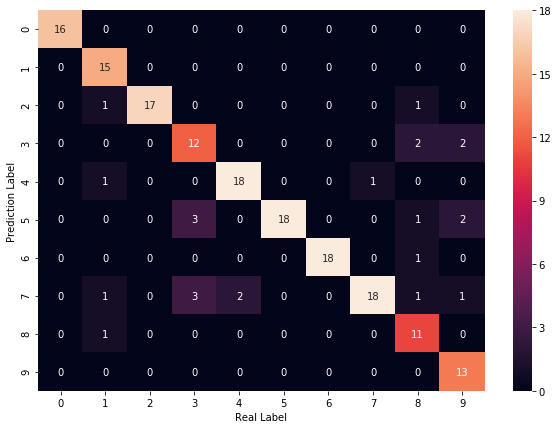

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:59 index:[5] real:5
#1 min_error:75 index:[2] real:2
#2 min_error:78 index:[8] real:8
#3 min_error:21 index:[0] real:0
#4 min_error:62 index:[1] real:1
#5 min_error:48 index:[7] real:7
#6 min_error:28 index:[6] real:6
#7 min_error:53 index:[3] real:3
#8 min_error:38 index:[2] real:2
#9 min_error:66 index:[1] real:1
#10 min_error:74 index:[7] real:7
#11 min_error:75 index:[7] real:4
#12 min_error:41 index:[6] real:6
#13 min_error:62 index:[3] real:3
#14 min_error:61 index:[1] real:1
#15 min_error:81 index:[3] real:3
#16 min_error:71 index:[7] real:9
#17 min_error:60 index:[1] real:1
#18 min_error:63 index:[7] real:7
#19 min_error:20 index:[6] real:6
#20 min_error:75 index:[8] real:8
#21 min_error:32 index:[4] real:4
#22 min_error:54 index:[3] real:3
#23 min_error:72 index:[1] real:1
#24 min_error:28 index:[4] real:4
#25 min_error:23 index:[0] real:0
#26 min_error:52 index:[5] real:5
#27 min_error:49 index:[3] real:3
#28 min_error:68 index:[6] real:6
#29 min_error:60 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8936301793444651
Avg Base Learner:0.7920222634508349


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

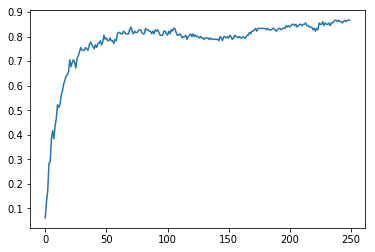

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4572 Total connections::4812
